# Pedidos de Vista no Plenário do STF

Obs.: Considerando somente os dados fornecidos pelo STF. Desconsiderando trâmites, trocas de ministros e/ou outros aspectos jurídicos que possam acarretar atrasos nas devoluções, etc. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Importando dados

In [2]:
df = pd.read_excel("http://www.stf.jus.br/arquivo/cms/processoPedidoVistaDevolvido/anexo/PEDIDODEVISTADOPLENRIO.xls")

### Visualizando dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
Processo             216 non-null object
Autuação             216 non-null object
Relator              216 non-null object
Vista a(o)           216 non-null object
Data do pedido       216 non-null datetime64[ns]
Data da Devolução    94 non-null datetime64[ns]
Pauta Temática       216 non-null object
dtypes: datetime64[ns](2), object(5)
memory usage: 11.9+ KB


In [4]:
df.head(5)

,Processo,Autuação,Relator,Vista a(o),Data do pedido,Data da Devolução,Pauta Temática
0,ADC 42,2016-04-08 00:00:00,Min. Luiz Fux,Min. Cármen Lúcia,2017-11-08,2017-12-11,Ver tema
1,ADI 4.901,2013-01-21 00:00:00,Min. Luiz Fux,Min. Cármen Lúcia,2017-11-08,2017-12-11,Ver tema
2,ADI 4.902,2013-01-21 00:00:00,Min. Luiz Fux,Min. Cármen Lúcia,2017-11-08,2017-12-11,Ver tema
3,ADI 4.903,2013-01-21 00:00:00,Min. Luiz Fux,Min. Cármen Lúcia,2017-11-08,2017-12-11,Ver tema
4,ADI 4.937,2013-04-04 00:00:00,Min. Luiz Fux,Min. Cármen Lúcia,2017-11-08,2017-12-11,Ver tema


### Quantos processos com pedido de vista em plenário?

In [5]:
len(df)

216

### Quantos processos com pedido de vista que não foram entregues?

In [6]:
len(df["Data da Devolução"]) - df["Data da Devolução"].count()

122

In [7]:
# Removendo processos que ainda não foram entregues
df = df[pd.notnull(df['Data da Devolução'])]

# Criando coluna quantidade de dias
df['Qtde Dias Visto'] = (df['Data da Devolução'] - df['Data do pedido']).dt.days

### Quantos processos com pedido de vista?

In [8]:
len(df)

94

### Quantos dias em média os ministros do STF demoram para devolver os processos?

In [9]:
int(df['Qtde Dias Visto'].mean())

637

### Qual processo demorou mais tempo para ser devolvido?

In [10]:
print(df['Qtde Dias Visto'].max(), "dias")

5098 dias


### Quais os dados deste processo?

In [11]:
df.ix[df['Qtde Dias Visto'].idxmax()]

Processo                       ADI 1.244
Autuação             1995-03-08 00:00:00
Relator               Min. Gilmar Mendes
Vista a(o)             Min. Ellen Gracie
Data do pedido       2003-04-23 00:00:00
Data da Devolução    2017-04-07 00:00:00
Pauta Temática                  Ver tema
Qtde Dias Visto                     5098
Name: 54, dtype: object

de 2003 à 2017

### Quantas vezes cada ministro pediu vista?

In [12]:
df['Vista a(o)'].value_counts()

Min. Alexandre de Moraes    20
Min. Edson Fachin           14
Min. Cármen Lúcia           13
Min. Dias Toffoli           10
Min. Marco Aurélio           9
Min. Rosa Weber              8
Min. Ayres Britto            5
Min. Luiz Fux                4
Min. Ellen Gracie            3
Min. Gilmar Mendes           3
Min. Roberto Barroso         2
Min. Sepúlveda Pertence      1
Teori Zavascki               1
Min. Ricardo Lewandowski     1
Name: Vista a(o), dtype: int64

O ministro 'mais novo' é o que mais pede vista

### Quantas vezes cada relator teve pedido de vista?

In [13]:
df['Relator'].value_counts()

Min. Dias Toffoli           13
Min. Alexandre de Moraes    11
Min. Cármen Lúcia           11
Min. Luiz Fux               10
Min. Marco Aurélio          10
Min. Gilmar Mendes           6
Min. Teori Zavascki          5
Min. Presidente              5
Min. Edson Fachin            5
Min. Ricardo Lewandowski     4
Min. Roberto Barroso         3
Min. Menezes Direito         2
Ministro Presidente          2
Min. LUIZ FUX                1
Min. Rosa Weber              1
Min. Cezar Pelulo            1
Min. Eros Grau               1
Min. Néri da Silveira        1
Min. Ilmar Galvão            1
Min. Joaquim Barbosa         1
Name: Relator, dtype: int64

Nota-se problemas com os dados aqui, por exemplo o Min. Luiz Fux está cadastrado 2 vezes. Ignorando por enquanto.

In [14]:
# Deixando pedidos de vista somente para ministros atuais

ministros_atuais = [
    'Min. Alexandre de Moraes',
    'Min. Cármen Lúcia',
    'Min. Dias Toffoli',
    'Min. Edson Fachin',
    'Min. Gilmar Mendes',
    'Min. Luiz Fux',
    'Min. Marco Aurélio',
    'Min. Ricardo Lewandowski',
    'Min. Roberto Barroso',
    'Min. Rosa Weber'
]


df = df[df['Vista a(o)'].isin(ministros_atuais)]

### Qual a média de dias para vista por ministro?

In [15]:
df.groupby('Vista a(o)').mean().sort_values('Qtde Dias Visto', ascending=False)

,Qtde Dias Visto
Vista a(o),
Min. Cármen Lúcia,1386.538462
Min. Roberto Barroso,1091.000000
Min. Gilmar Mendes,1045.666667
Min. Ricardo Lewandowski,433.000000
Min. Rosa Weber,321.375000
Min. Dias Toffoli,305.800000
Min. Alexandre de Moraes,277.750000
Min. Luiz Fux,170.000000
Min. Marco Aurélio,13.222222


### Gráficos

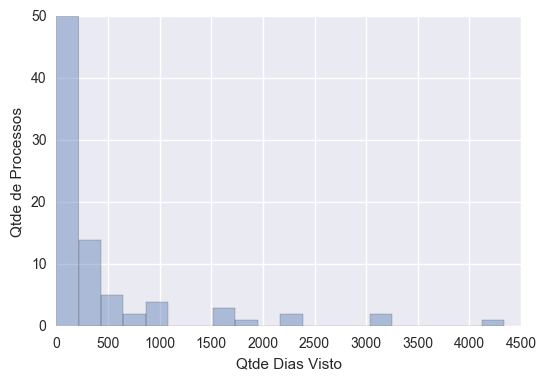

In [16]:
sns.distplot(df['Qtde Dias Visto'].astype(np.int), bins=20, kde=False)
plt.ylabel("Qtde de Processos")

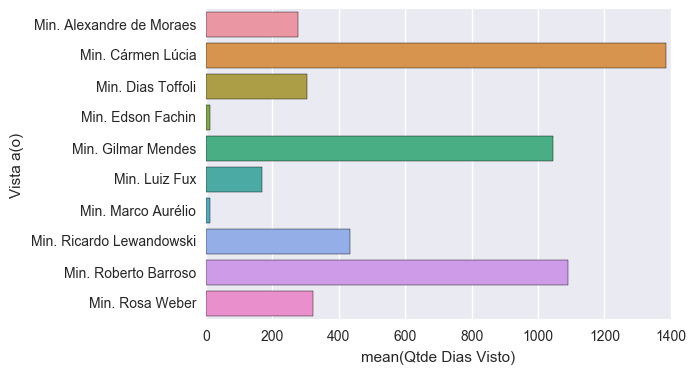

In [17]:
sns.barplot(data=df, x="Qtde Dias Visto", y="Vista a(o)", ci=None, order=ministros_atuais)

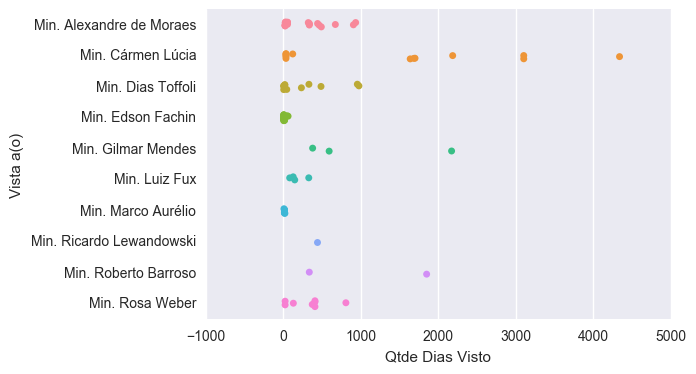

In [18]:
sns.stripplot(data=df, x="Qtde Dias Visto", y="Vista a(o)", jitter=True, order=ministros_atuais);

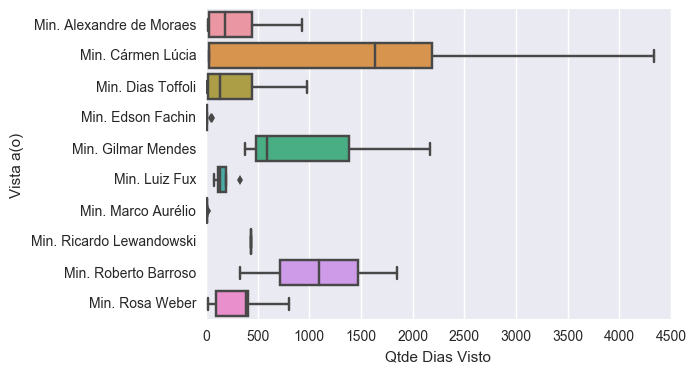

In [19]:
sns.boxplot(data=df,  x="Qtde Dias Visto", y="Vista a(o)", order=ministros_atuais);

### Número de vezes que um ministro foi relator e teve um pedido de vista X Número de vezes que um ministro pediu vista

In [20]:
# Série: Quantidade de vezes que cada ministro foi relator e teve pedido de vista por outro ministro
s_relator = df['Relator'].value_counts()

# Série: Quantidade de vezes que cada ministro pediu vista
s_vista = df['Vista a(o)'].value_counts()

# Combinando as 2 séries
df_scatter = pd.concat([s_relator, s_vista], axis=1).reset_index()

# Renomenado coluna
df_scatter.rename(columns={"index": "Ministro"}, inplace=True)

# Valores nulos para zero
df_scatter = df_scatter.fillna(0)

# Convertendo float para int
df_scatter['Vista a(o)'] = df_scatter['Vista a(o)'].astype(int)

print(df_scatter.dtypes)

df_scatter

Ministro      object
Relator        int64
Vista a(o)     int64
dtype: object


,Ministro,Relator,Vista a(o)
0,Min. Alexandre de Moraes,11,20
1,Min. Cezar Pelulo,1,0
2,Min. Cármen Lúcia,10,13
3,Min. Dias Toffoli,13,10
4,Min. Edson Fachin,5,14
5,Min. Gilmar Mendes,5,3
6,Min. Ilmar Galvão,1,0
7,Min. Joaquim Barbosa,1,0
8,Min. Luiz Fux,10,4
9,Min. Marco Aurélio,8,9


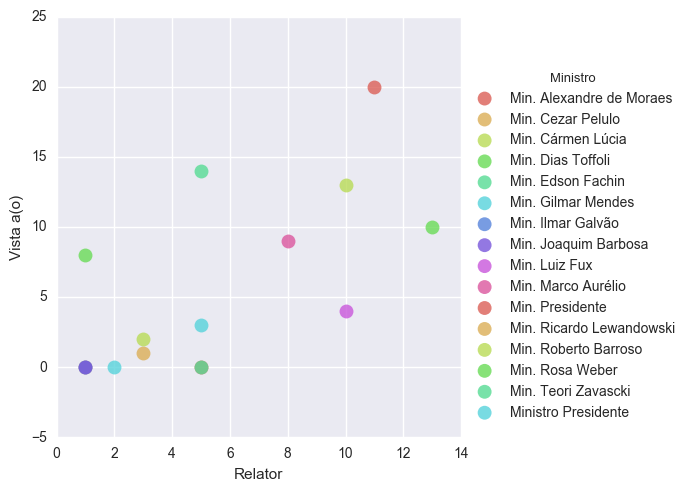

In [21]:
paleta = sns.color_palette("hls", 10)
sns.lmplot(data=df_scatter, x='Relator', y='Vista a(o)', fit_reg=False, hue="Ministro", palette=paleta, scatter_kws={"s": 100})

Suemar Éverton  
suemareverton@gmail.com  
Criado em: 03/01/2017  
Última atualização: 03/01/2017